In [1]:
%load_ext autoreload
%autoreload 2

from setup_imports import *  # noqa: F401,F403
from src.phrases.phrase_model import Phrase, PhraseAudio, Translation, get_phrase, get_phrase_by_english
from src.phrases.search import get_phrases_by_collection
from src.models import BCP47Language
from src.connections.gcloud_auth import get_firestore_client
from src.audio import get_voice_model, generate_translation_audio
from src.gcs_storage import read_from_gcs
from src.storage import PRIVATE_BUCKET, download_from_gcs
from src.llm_tools.image_generation import generate_phrase_image_prompt
from src.images.generator import generate_image
# Hello World Test - Full Workflow
# =================================

# OUR_PHRASE = "Hello, world!"
# phrase = Phrase.create_phrase(OUR_PHRASE, source="manual")
# print(f"✓ Created phrase: {phrase.phrase_hash}")


✅ Added c:\Users\andyl\Python\audio-language-trainer to Python path
✅ 'src' module is now importable


In [33]:
from google.cloud.firestore_v1 import FieldFilter
p = get_phrases_by_collection(["Pack01"])


In [34]:
len(p)

77

In [10]:
phrase = "Do you collect rare coins?"

prompt = generate_phrase_image_prompt(phrase)


🎨 Starting image generation process
   Prompt: A person with an excited expression examining a rare ancient coin through a magnifying glass while sitting at a desk with an open collector's album displaying various colorful and unusual coins in protective sleeves in the style of digital painting style, soft brush blending, subtle gradient shading, realistic human proportions, semi-realistic character design, muted warm color palette with peachy tones, atmospheric lighting, detailed environmental backgrounds, smooth color transitions, contemporary illustration style, gentle line work, painterly texture, expressive facial features, emotional character acting, slightly simplified facial anatomy, clear readable expressions, animated character emotion
   Will try providers in order: ['imagen', 'stability', 'deepai']
🔄 Attempting image generation with imagen...
✅ Successfully generated image with imagen


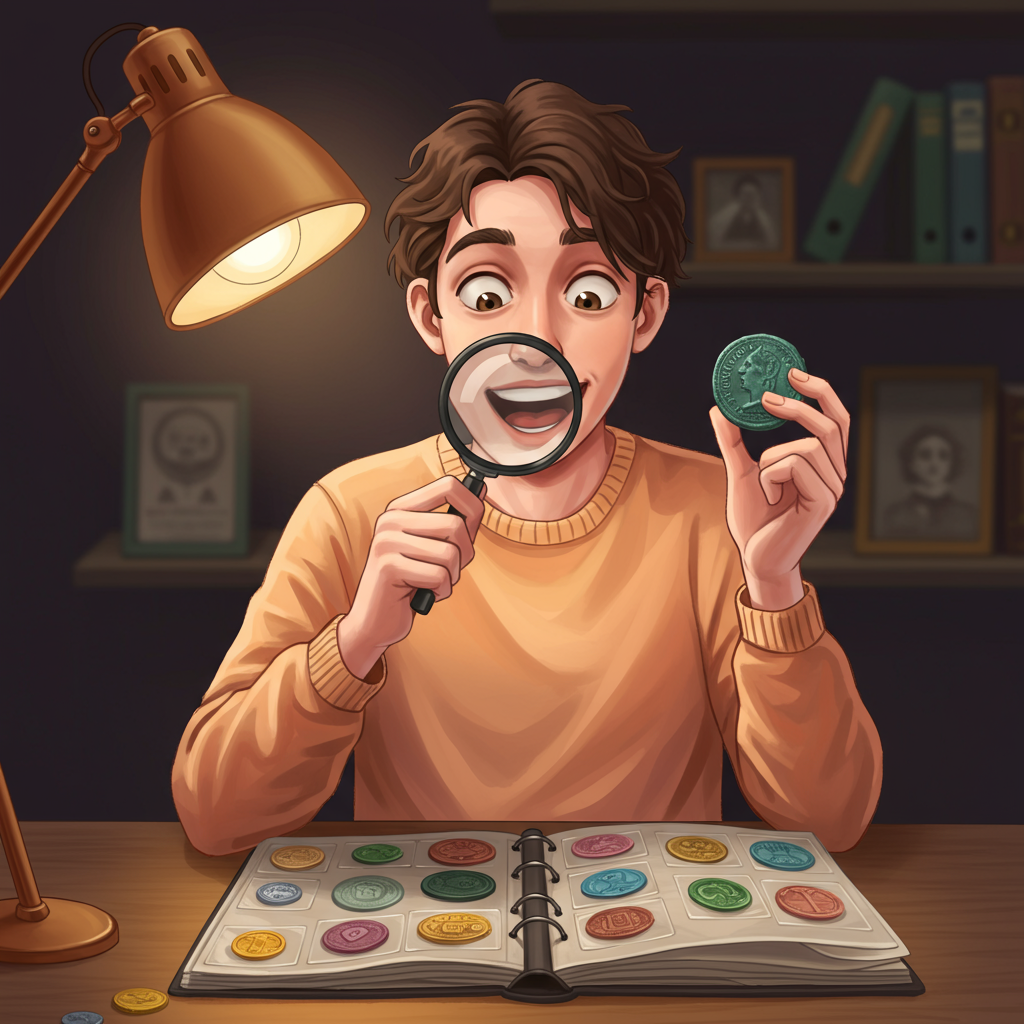

In [11]:
style = "new_default"
# Generate the image using available providers
image = generate_image(
    prompt=prompt,
    style=style
)
image

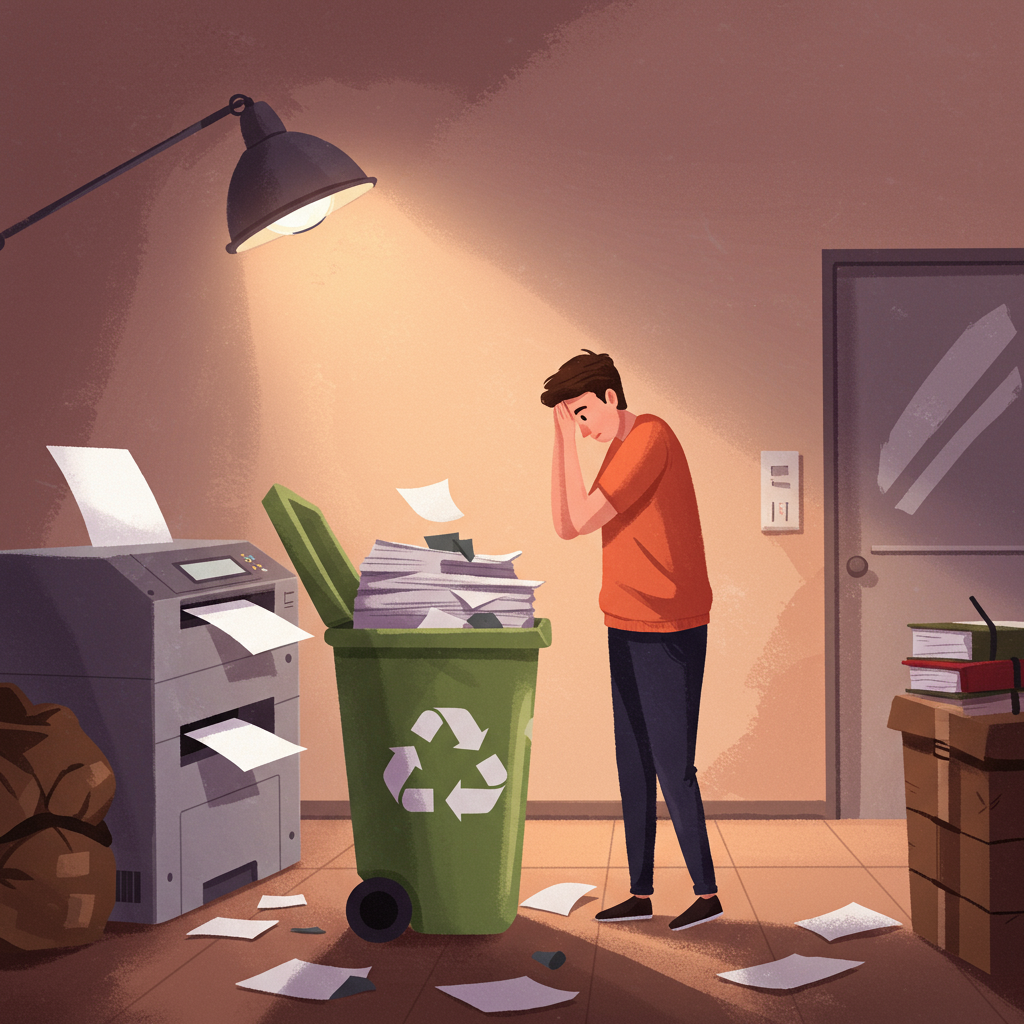

In [4]:
image

In [4]:
WarmUp150_phrase = download_from_gcs(bucket_name=PRIVATE_BUCKET, file_path="collections/WarmUp150/phrases.json")

In [2]:
phrases = get_phrases_by_collection("WarmUp150")

✅ Authenticated with Google Cloud project: swedish-course


In [4]:
phrases[0].translations['fr-FR'].get_wiktionary_links()

'<a href="https://en.wiktionary.org/wiki/va#French" target="_blank" rel="noopener">Va</a> <a href="https://en.wiktionary.org/wiki/ouvrir#French" target="_blank" rel="noopener">ouvrir</a> <a href="https://en.wiktionary.org/wiki/la#French" target="_blank" rel="noopener">la</a> <a href="https://en.wiktionary.org/wiki/porte#French" target="_blank" rel="noopener">porte</a> , s\' <a href="https://en.wiktionary.org/wiki/il#French" target="_blank" rel="noopener">il</a> <a href="https://en.wiktionary.org/wiki/te#French" target="_blank" rel="noopener">te</a> <a href="https://en.wiktionary.org/wiki/pla%C3%AEt#French" target="_blank" rel="noopener">plaît</a>'

In [6]:
phrases[0].translations['fr-FR'].tokens

['Va', 'ouvrir', 'la', 'porte', ',', "s'", 'il', 'te', 'plaît']

In [6]:
#french translation text

french_translations = download_from_gcs(bucket_name=PRIVATE_BUCKET, file_path="collections/WarmUp150/french/translations.json")

In [7]:
from itertools import islice
from tqdm import tqdm
WARUMUP_PHRASES = []

for old_hash, phrase_dict in tqdm(french_translations.items()):
    english_text = phrase_dict["english"]
    french_text = phrase_dict["french"]

    p = Phrase.create(english_text)
    p.collections.append('WarmUp150')
    p.translate('fr-FR', translated_text=french_text)
    p.upload()
    WARUMUP_PHRASES.append(p)

  0%|          | 0/249 [00:00<?, ?it/s]

✅ Authenticated with Google Cloud project: swedish-course
✅ Natural Language API client initialized
Uploading phrase i_cant_figure_it_out_4b7134 with all translations to Firestore and GCS


  0%|          | 1/249 [00:06<26:27,  6.40s/it]

Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase do_you_know_the_way_b51061 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


  1%|          | 2/249 [00:08<14:53,  3.62s/it]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase lets_have_tea_this_afternoon_0740e1 with all translations to Firestore and GCS


  1%|          | 3/249 [00:09<11:18,  2.76s/it]

Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase im_trying_to_lose_weight_7a7485 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


  2%|▏         | 4/249 [00:11<09:31,  2.33s/it]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_might_get_a_new_job_41e5d2 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


  2%|▏         | 5/249 [00:13<08:30,  2.09s/it]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase look_at_that_beautiful_sunset_225a6a with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


  2%|▏         | 6/249 [00:14<07:10,  1.77s/it]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_cant_find_my_keys_b22ed9 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


  3%|▎         | 7/249 [00:15<07:01,  1.74s/it]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase can_you_lift_this_box_c976c3 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


  3%|▎         | 8/249 [00:17<06:09,  1.53s/it]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase follow_the_road_straight_ahead_16e12e with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


  4%|▎         | 9/249 [00:18<06:16,  1.57s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


  4%|▍         | 10/249 [00:19<05:41,  1.43s/it]

Uploading phrase did_you_notice_anything_odd_79b149 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


  4%|▍         | 11/249 [00:20<05:15,  1.32s/it]

Uploading phrase do_you_believe_in_ghosts_7d539a with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


  5%|▍         | 12/249 [00:22<04:57,  1.26s/it]

Uploading phrase do_you_think_itll_rain_92ff0c with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


  5%|▌         | 13/249 [00:23<05:19,  1.36s/it]

Uploading phrase what_did_you_say_again_862aef with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase hold_on_to_the_rail_640334 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


  6%|▌         | 14/249 [00:25<05:36,  1.43s/it]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase we_should_sell_these_old_books_e6828f with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


  6%|▌         | 15/249 [00:26<05:48,  1.49s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


  6%|▋         | 16/249 [00:27<04:37,  1.19s/it]

Uploading phrase could_you_help_me_please_6e3a43 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


  7%|▋         | 17/249 [00:28<04:26,  1.15s/it]

Uploading phrase i_cant_open_this_door_374b12 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


  7%|▋         | 18/249 [00:29<04:19,  1.12s/it]

Uploading phrase i_suppose_youre_right_d04d23 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase shake_hands_with_everyone_f70f6e with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


  8%|▊         | 19/249 [00:30<04:18,  1.12s/it]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase well_bury_the_treasure_here_bd7217 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


  8%|▊         | 20/249 [00:32<04:56,  1.29s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


  8%|▊         | 21/249 [00:33<05:13,  1.37s/it]

Uploading phrase lets_prepare_for_the_wedding_40ab82 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_enjoy_reading_good_books_ee8e89 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


  9%|▉         | 22/249 [00:34<04:16,  1.13s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


  9%|▉         | 23/249 [00:35<04:08,  1.10s/it]

Uploading phrase theyre_getting_married_next_month_b15402 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 10%|▉         | 24/249 [00:36<04:03,  1.08s/it]

Uploading phrase stop_making_such_noise_eb5169 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 10%|█         | 25/249 [00:37<03:58,  1.07s/it]

Uploading phrase oh_no_its_feast_week_9f2537 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 10%|█         | 26/249 [00:39<04:29,  1.21s/it]

Uploading phrase we_need_to_leave_now_c4da76 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 11%|█         | 27/249 [00:40<04:17,  1.16s/it]

Uploading phrase can_you_share_your_notes_4bc9fb with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 11%|█         | 28/249 [00:41<04:42,  1.28s/it]

Uploading phrase i_doubt_theres_anything_interesting_d83818 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 12%|█▏        | 29/249 [00:43<04:58,  1.36s/it]

Uploading phrase how_long_will_it_last_6d941d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 12%|█▏        | 30/249 [00:44<04:34,  1.25s/it]

Uploading phrase my_goldfish_died_this_morning_b56574 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase does_it_really_matter_much_b379c6 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 12%|█▏        | 31/249 [00:45<04:57,  1.37s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 13%|█▎        | 32/249 [00:47<05:05,  1.41s/it]

Uploading phrase will_you_accept_this_gift_7e2fd5 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 13%|█▎        | 33/249 [00:48<05:16,  1.47s/it]

Uploading phrase dont_hurt_yourself_be_careful_6bf8e8 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase do_you_want_anything_else_fe3389 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 14%|█▎        | 34/249 [00:50<04:51,  1.35s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 14%|█▍        | 35/249 [00:50<03:54,  1.10s/it]

Uploading phrase shall_we_go_shopping_today_bb9e47 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 14%|█▍        | 36/249 [00:52<04:21,  1.23s/it]

Uploading phrase may_i_offer_you_tea_442255 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 15%|█▍        | 37/249 [00:53<04:07,  1.17s/it]

Uploading phrase would_you_like_some_tea_bdec6d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 15%|█▌        | 38/249 [00:54<03:57,  1.13s/it]

Uploading phrase use_this_glove_to_cook_415545 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 16%|█▌        | 39/249 [00:54<03:19,  1.05it/s]

Uploading phrase we_must_defend_our_culture_500c81 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 16%|█▌        | 40/249 [00:55<02:51,  1.22it/s]

Uploading phrase during_lifes_final_moments_normally_d6ff9a with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 16%|█▋        | 41/249 [00:56<03:34,  1.03s/it]

Uploading phrase remind_me_to_check_in_061de9 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 17%|█▋        | 42/249 [00:57<03:37,  1.05s/it]

Uploading phrase i_hope_you_feel_better_2f51a0 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 17%|█▋        | 43/249 [00:58<03:39,  1.07s/it]

Uploading phrase i_cant_decide_what_to_wear_cb763b with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase its_just_terrible_weather_c062a3 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 18%|█▊        | 44/249 [01:00<04:13,  1.24s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 18%|█▊        | 45/249 [01:02<04:30,  1.33s/it]

Uploading phrase do_you_like_my_hat_6ac93b with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_cant_find_my_coat_79e395 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 18%|█▊        | 46/249 [01:03<04:43,  1.40s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 19%|█▉        | 47/249 [01:04<03:49,  1.13s/it]

Uploading phrase i_suppose_its_possible_de04d4 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 19%|█▉        | 48/249 [01:05<04:15,  1.27s/it]

Uploading phrase can_you_lift_this_safely_a62980 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase do_you_understand_the_question_b9269f with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 20%|█▉        | 49/249 [01:06<03:31,  1.06s/it]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase can_you_taste_this_soup_4dfa0d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 20%|██        | 50/249 [01:07<03:32,  1.07s/it]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase can_you_change_the_channel_4f4b5a with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 20%|██        | 51/249 [01:08<04:02,  1.23s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 21%|██        | 52/249 [01:10<04:21,  1.33s/it]

Uploading phrase do_you_know_that_person_6ae1da with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase lets_meet_at_the_church_e46b83 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 21%|██▏       | 53/249 [01:11<04:07,  1.26s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 22%|██▏       | 54/249 [01:13<04:24,  1.36s/it]

Uploading phrase they_arrived_at_the_airport_4c6ebd with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 22%|██▏       | 55/249 [01:13<03:36,  1.11s/it]

Uploading phrase can_you_call_me_later_c92fbf with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 22%|██▏       | 56/249 [01:15<04:01,  1.25s/it]

Uploading phrase she_stood_in_front_of_the_mirror_1c2f70 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase stop_worrying_about_everything_303702 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 23%|██▎       | 57/249 [01:16<03:48,  1.19s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 23%|██▎       | 58/249 [01:17<03:43,  1.17s/it]

Uploading phrase shall_we_start_the_meeting_5f90bd with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 24%|██▎       | 59/249 [01:18<03:35,  1.14s/it]

Uploading phrase what_happened_to_your_car_0676dc with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase did_you_see_that_film_8a8a90 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 24%|██▍       | 60/249 [01:19<03:31,  1.12s/it]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_hate_waking_up_early_09b934 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 24%|██▍       | 61/249 [01:21<03:58,  1.27s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 25%|██▍       | 62/249 [01:22<03:41,  1.18s/it]

Uploading phrase the_cake_tastes_delicious_524e7b with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 25%|██▌       | 63/249 [01:23<03:35,  1.16s/it]

Uploading phrase lets_have_a_party_tonight_ee955e with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 26%|██▌       | 64/249 [01:24<04:00,  1.30s/it]

Uploading phrase that_sounds_like_a_bell_d97da9 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_love_your_new_dress_ae133d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 27%|██▋       | 66/249 [01:27<03:35,  1.18s/it]

Uploading phrase we_should_grow_more_flowers_40345f with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 27%|██▋       | 67/249 [01:28<03:31,  1.16s/it]

Uploading phrase lets_eat_lunch_tomorrow_b765fb with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_cant_remember_her_name_84e2fb with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 27%|██▋       | 68/249 [01:28<02:58,  1.02it/s]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_love_this_time_of_year_465e42 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 28%|██▊       | 69/249 [01:30<03:37,  1.21s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 28%|██▊       | 70/249 [01:32<03:56,  1.32s/it]

Uploading phrase people_still_need_their_space_a78ab5 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase show_me_how_it_works_23bd64 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 29%|██▊       | 71/249 [01:32<03:13,  1.08s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 29%|██▉       | 72/249 [01:33<03:09,  1.07s/it]

Uploading phrase i_might_learn_to_drive_4dcb3d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 29%|██▉       | 73/249 [01:34<03:09,  1.07s/it]

Uploading phrase raise_your_hand_to_speak_24ac0e with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 30%|██▉       | 74/249 [01:35<03:06,  1.07s/it]

Uploading phrase dont_miss_the_train_hurry_00b9be with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 30%|███       | 75/249 [01:36<03:06,  1.07s/it]

Uploading phrase turn_off_the_alarm_please_58bb53 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_cant_stand_this_heat_0b8809 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 31%|███       | 76/249 [01:37<02:37,  1.10it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 31%|███       | 77/249 [01:37<02:17,  1.25it/s]

Uploading phrase im_going_to_the_bedroom_98d0fe with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 31%|███▏      | 78/249 [01:38<02:03,  1.38it/s]

Uploading phrase im_ready_to_start_3befd5 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 32%|███▏      | 79/249 [01:39<02:18,  1.23it/s]

Uploading phrase do_you_need_any_help_3c724d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase do_you_feel_any_better_669573 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 32%|███▏      | 80/249 [01:40<02:03,  1.37it/s]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase we_must_defend_our_opinion_5c7566 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 33%|███▎      | 81/249 [01:40<01:54,  1.46it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 33%|███▎      | 82/249 [01:41<02:16,  1.23it/s]

Uploading phrase im_going_to_the_bank_dcdd52 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_might_go_to_bed_early_0de829 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 33%|███▎      | 83/249 [01:43<02:54,  1.05s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 34%|███▎      | 84/249 [01:44<02:51,  1.04s/it]

Uploading phrase i_cant_stand_the_traffic_e9be8d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 34%|███▍      | 85/249 [01:45<03:15,  1.19s/it]

Uploading phrase dont_forget_your_umbrella_today_165d8b with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 35%|███▍      | 86/249 [01:46<02:41,  1.01it/s]

Uploading phrase do_you_doubt_your_abilities_a0afc9 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 35%|███▍      | 87/249 [01:46<02:16,  1.19it/s]

Uploading phrase dont_drop_that_glass_please_9817c7 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 35%|███▌      | 88/249 [01:47<02:24,  1.12it/s]

Uploading phrase can_you_choose_a_movie_fe5421 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 36%|███▌      | 89/249 [01:49<02:54,  1.09s/it]

Uploading phrase lets_play_a_game_tonight_84eb6c with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 36%|███▌      | 90/249 [01:51<03:21,  1.27s/it]

Uploading phrase dont_fall_asleep_yet_please_963066 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 37%|███▋      | 91/249 [01:52<03:32,  1.35s/it]

Uploading phrase can_you_catch_that_bus_fd8849 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase breath_underwater_for_two_minutes_1615d1 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 37%|███▋      | 93/249 [01:54<02:40,  1.03s/it]

Uploading phrase lets_dive_into_the_adventure_2b0232 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 38%|███▊      | 94/249 [01:55<02:40,  1.04s/it]

Uploading phrase where_do_you_live_now_057c5f with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 38%|███▊      | 95/249 [01:56<03:02,  1.19s/it]

Uploading phrase lets_celebrate_your_birthday_soon_c8a251 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 39%|███▊      | 96/249 [01:58<03:19,  1.30s/it]

Uploading phrase can_you_stick_around_longer_b68375 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 39%|███▉      | 97/249 [01:59<03:07,  1.23s/it]

Uploading phrase lets_discuss_over_breakfast_d1412b with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 39%|███▉      | 98/249 [02:00<02:59,  1.19s/it]

Uploading phrase truth_is_an_interesting_possibility_4fd0d5 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 40%|███▉      | 99/249 [02:01<02:27,  1.02it/s]

Uploading phrase when_does_the_show_start_86ccfd with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase do_you_have_any_plans_1b3057 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 40%|████      | 100/249 [02:02<02:32,  1.02s/it]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase the_other_one_is_ready_6fe568 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 41%|████      | 101/249 [02:03<02:32,  1.03s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 41%|████      | 102/249 [02:04<02:32,  1.04s/it]

Uploading phrase did_you_pay_the_bill_f90ab6 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase who_will_teach_the_class_a8769f with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 42%|████▏     | 104/249 [02:06<02:56,  1.22s/it]

Uploading phrase did_you_graduate_last_year_f17021 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 42%|████▏     | 105/249 [02:08<03:10,  1.32s/it]

Uploading phrase how_do_you_spend_money_b47e53 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 43%|████▎     | 106/249 [02:09<02:56,  1.23s/it]

Uploading phrase cut_the_cake_in_half_d0cef1 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 43%|████▎     | 107/249 [02:10<02:47,  1.18s/it]

Uploading phrase can_you_play_the_guitar_2876aa with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 43%|████▎     | 108/249 [02:11<02:41,  1.14s/it]

Uploading phrase do_you_want_to_shop_0398ec with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 44%|████▍     | 109/249 [02:12<02:34,  1.11s/it]

Uploading phrase lets_develop_green_public_places_fd0aef with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 44%|████▍     | 110/249 [02:13<02:30,  1.08s/it]

Uploading phrase shall_we_ensure_child_safety_12a232 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 45%|████▍     | 111/249 [02:14<02:27,  1.07s/it]

Uploading phrase lets_plan_our_next_trip_1f37df with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_cant_understand_this_puzzle_9019d9 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 45%|████▌     | 113/249 [02:16<02:02,  1.11it/s]

Uploading phrase theyre_building_a_new_bridge_e04c26 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 46%|████▌     | 114/249 [02:17<02:27,  1.09s/it]

Uploading phrase did_you_hear_that_noise_1dc795 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 46%|████▌     | 115/249 [02:18<02:22,  1.06s/it]

Uploading phrase the_original_team_is_speaking_c981cf with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 47%|████▋     | 116/249 [02:19<02:20,  1.06s/it]

Uploading phrase dont_drag_your_feet_ea419e with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 47%|████▋     | 117/249 [02:20<01:56,  1.13it/s]

Uploading phrase chart_your_own_development_d38b9c with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase note_down_the_main_points_ae5a66 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 48%|████▊     | 119/249 [02:21<01:46,  1.23it/s]

Uploading phrase i_bet_its_too_expensive_e90ce9 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 48%|████▊     | 120/249 [02:23<01:53,  1.13it/s]

Uploading phrase each_moment_is_quite_calm_d3b9ab with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase the_bag_is_heavy_241eaa with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 49%|████▊     | 121/249 [02:23<01:40,  1.27it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 49%|████▉     | 122/249 [02:24<01:49,  1.15it/s]

Uploading phrase do_you_have_a_great_idea_ed851f with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 49%|████▉     | 123/249 [02:25<01:35,  1.32it/s]

Uploading phrase im_feeling_fine_but_tired_5ec361 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 50%|████▉     | 124/249 [02:25<01:26,  1.45it/s]

Uploading phrase the_community_center_needs_volunteers_7d1722 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 50%|█████     | 125/249 [02:26<01:38,  1.26it/s]

Uploading phrase the_first_fifty_pounds_definitely_63ab01 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase its_a_terrible_day_unfortunately_d34ca7 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 51%|█████     | 127/249 [02:27<01:18,  1.55it/s]

Uploading phrase what_do_you_mean_exactly_e0ece5 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 51%|█████▏    | 128/249 [02:28<01:32,  1.31it/s]

Uploading phrase put_the_plate_in_water_be89ed with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 52%|█████▏    | 129/249 [02:29<01:20,  1.48it/s]

Uploading phrase i_support_your_decision_completely_161b0e with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 52%|█████▏    | 130/249 [02:29<01:14,  1.60it/s]

Uploading phrase dont_mention_it_to_anyone_566f08 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 53%|█████▎    | 131/249 [02:30<01:09,  1.70it/s]

Uploading phrase bring_your_own_safety_gear_4b1403 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 53%|█████▎    | 132/249 [02:30<01:06,  1.76it/s]

Uploading phrase we_should_act_more_responsibly_074f81 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 53%|█████▎    | 133/249 [02:31<01:03,  1.82it/s]

Uploading phrase imagine_a_world_without_fear_459a75 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase lets_sit_on_the_balcony_2373b3 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 54%|█████▍    | 134/249 [02:31<01:03,  1.82it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 54%|█████▍    | 135/249 [02:32<01:19,  1.44it/s]

Uploading phrase the_speech_was_quite_interesting_21604b with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 55%|█████▍    | 136/249 [02:33<01:29,  1.26it/s]

Uploading phrase how_will_you_resolve_this_f3f765 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 55%|█████▌    | 137/249 [02:35<01:52,  1.01s/it]

Uploading phrase who_will_teach_us_golf_757f78 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 55%|█████▌    | 138/249 [02:36<01:54,  1.03s/it]

Uploading phrase dont_bother_him_now_please_2c7510 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 56%|█████▌    | 139/249 [02:37<01:37,  1.13it/s]

Uploading phrase give_me_your_honest_opinion_ea12dc with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 56%|█████▌    | 140/249 [02:37<01:23,  1.31it/s]

Uploading phrase i_might_buy_a_new_car_006c85 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 57%|█████▋    | 141/249 [02:37<01:12,  1.49it/s]

Uploading phrase we_should_save_some_money_cdb91c with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 57%|█████▋    | 142/249 [02:39<01:24,  1.27it/s]

Uploading phrase do_you_like_spicy_food_b8ce42 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 57%|█████▋    | 143/249 [02:39<01:13,  1.45it/s]

Uploading phrase do_you_realize_how_late_it_is_102719 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 58%|█████▊    | 144/249 [02:40<01:23,  1.26it/s]

Uploading phrase can_you_film_the_concert_3b2324 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 58%|█████▊    | 145/249 [02:42<01:45,  1.02s/it]

Uploading phrase yes_the_letter_came_through_0b0f79 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 59%|█████▊    | 146/249 [02:42<01:28,  1.16it/s]

Uploading phrase we_should_maintain_our_friendship_241a5a with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 59%|█████▉    | 147/249 [02:44<01:49,  1.07s/it]

Uploading phrase lets_have_dinner_outside_tonight_023886 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 59%|█████▉    | 148/249 [02:45<01:46,  1.05s/it]

Uploading phrase he_has_a_big_office_03e7f1 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 60%|█████▉    | 149/249 [02:45<01:29,  1.12it/s]

Uploading phrase it_seems_like_a_mistake_ca4df7 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 60%|██████    | 150/249 [02:46<01:16,  1.29it/s]

Uploading phrase please_shut_the_door_quietly_10826f with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 61%|██████    | 151/249 [02:47<01:24,  1.16it/s]

Uploading phrase answer_the_phone_quickly_8bb167 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 61%|██████    | 152/249 [02:48<01:28,  1.10it/s]

Uploading phrase can_you_reach_that_shelf_24ffe8 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 61%|██████▏   | 153/249 [02:48<01:16,  1.25it/s]

Uploading phrase im_going_to_school_calmly_2a87bb with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 62%|██████▏   | 154/249 [02:49<01:22,  1.16it/s]

Uploading phrase can_you_refer_me_to_someone_de4d18 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 62%|██████▏   | 155/249 [02:50<01:24,  1.11it/s]

Uploading phrase consider_the_possible_consequences_9cf456 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 63%|██████▎   | 156/249 [02:51<01:12,  1.28it/s]

Uploading phrase do_you_care_about_politics_b8fd83 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 63%|██████▎   | 157/249 [02:51<01:04,  1.43it/s]

Uploading phrase i_love_your_new_hairstyle_01e902 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 63%|██████▎   | 158/249 [02:52<00:58,  1.55it/s]

Uploading phrase answer_the_door_please_54bb4e with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 64%|██████▍   | 159/249 [02:53<01:08,  1.32it/s]

Uploading phrase dont_lose_your_train_ticket_819932 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 64%|██████▍   | 160/249 [02:53<01:00,  1.46it/s]

Uploading phrase we_should_try_that_restaurant_54a21a with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 65%|██████▍   | 161/249 [02:55<01:23,  1.05it/s]

Uploading phrase bring_the_stove_tonight_985210 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 65%|██████▌   | 162/249 [02:56<01:25,  1.02it/s]

Uploading phrase i_might_go_abroad_soon_8b9361 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 65%|██████▌   | 163/249 [02:57<01:18,  1.09it/s]

Uploading phrase do_you_speak_any_languages_e1f320 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 66%|██████▌   | 164/249 [02:58<01:21,  1.04it/s]

Uploading phrase can_you_speak_more_slowly_5aa0cc with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_love_your_new_haircut_76897e with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 66%|██████▋   | 165/249 [02:59<01:36,  1.14s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 67%|██████▋   | 166/249 [03:00<01:19,  1.05it/s]

Uploading phrase i_love_the_spring_weather_cd9a51 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 67%|██████▋   | 167/249 [03:01<01:20,  1.01it/s]

Uploading phrase i_love_this_new_song_9d0cb4 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase tell_me_about_your_holiday_d2b2ab with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 68%|██████▊   | 169/249 [03:03<01:09,  1.16it/s]

Uploading phrase lets_produce_a_documentary_ce1bf0 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase can_you_organize_the_event_b5732c with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 69%|██████▊   | 171/249 [03:04<00:53,  1.45it/s]

Uploading phrase lets_watch_a_movie_tonight_3625f8 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 69%|██████▉   | 172/249 [03:04<00:48,  1.58it/s]

Uploading phrase lets_take_a_different_route_ecbc00 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 69%|██████▉   | 173/249 [03:06<01:09,  1.10it/s]

Uploading phrase can_we_talk_about_this_096ba6 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 70%|██████▉   | 174/249 [03:06<00:58,  1.27it/s]

Uploading phrase ill_graduate_from_college_soon_61d40d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 70%|███████   | 175/249 [03:07<00:52,  1.41it/s]

Uploading phrase dont_forget_your_appointment_please_553a31 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 71%|███████   | 176/249 [03:08<00:59,  1.23it/s]

Uploading phrase can_you_resolve_this_issue_3af62d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase pay_attention_to_the_teacher_c6661d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 71%|███████   | 177/249 [03:09<01:15,  1.05s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 71%|███████▏  | 178/249 [03:10<01:03,  1.12it/s]

Uploading phrase lets_meet_despite_the_rain_3e4b40 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase dont_lose_hope_stay_strong_9dcb47 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 72%|███████▏  | 179/249 [03:11<01:05,  1.06it/s]

Uploading phrase ring_me_back_later_please_f82ba8 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 73%|███████▎  | 181/249 [03:13<01:07,  1.00it/s]

Uploading phrase those_holes_need_fixing_soon_f37a2a with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 73%|███████▎  | 182/249 [03:13<00:56,  1.19it/s]

Uploading phrase get_rid_of_old_furniture_f44b7d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 73%|███████▎  | 183/249 [03:15<00:59,  1.11it/s]

Uploading phrase i_must_finish_my_homework_1e371b with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 74%|███████▍  | 184/249 [03:15<00:51,  1.27it/s]

Uploading phrase does_this_coat_fit_you_318da0 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase we_should_try_something_new_cbcbf1 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 74%|███████▍  | 185/249 [03:16<00:45,  1.40it/s]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase how_do_you_spend_weekends_719443 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 75%|███████▌  | 187/249 [03:18<01:03,  1.02s/it]

Uploading phrase did_the_phone_ring_again_545061 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 76%|███████▌  | 188/249 [03:19<01:02,  1.03s/it]

Uploading phrase show_me_your_passport_27f9b2 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 76%|███████▌  | 189/249 [03:20<01:01,  1.03s/it]

Uploading phrase what_does_that_mean_exactly_886ba5 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 76%|███████▋  | 190/249 [03:21<01:00,  1.03s/it]

Uploading phrase i_cant_work_this_weekend_403ea6 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 77%|███████▋  | 191/249 [03:22<00:50,  1.15it/s]

Uploading phrase i_enjoy_reading_in_bed_86bb17 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 77%|███████▋  | 192/249 [03:22<00:43,  1.30it/s]

Uploading phrase lets_go_for_a_walk_7e7120 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_enjoy_cooking_french_food_83103d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 78%|███████▊  | 193/249 [03:23<00:48,  1.15it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 78%|███████▊  | 194/249 [03:24<00:50,  1.09it/s]

Uploading phrase its_a_regional_issue_0ccd47 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 78%|███████▊  | 195/249 [03:25<00:43,  1.25it/s]

Uploading phrase i_bet_youre_too_busy_bd910e with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase ill_apply_for_the_job_7ac179 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 79%|███████▉  | 197/249 [03:26<00:40,  1.29it/s]

Uploading phrase can_you_organize_my_wedding_cd9f3c with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 80%|███████▉  | 198/249 [03:27<00:35,  1.43it/s]

Uploading phrase lets_explore_the_reef_tomorrow_ae873e with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 80%|███████▉  | 199/249 [03:28<00:40,  1.25it/s]

Uploading phrase apply_the_cream_carefully_please_96c8b4 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 80%|████████  | 200/249 [03:29<00:42,  1.15it/s]

Uploading phrase every_regional_product_is_fine_114bad with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase produce_a_solution_by_friday_cfab39 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 81%|████████  | 201/249 [03:30<00:44,  1.08it/s]

Uploading phrase what_are_the_local_concerns_351ec7 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 81%|████████  | 202/249 [03:31<00:38,  1.23it/s]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase dont_break_my_heart_please_e49126 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 82%|████████▏ | 203/249 [03:31<00:34,  1.34it/s]

Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase we_should_enhance_our_skills_d82a63 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 82%|████████▏ | 204/249 [03:32<00:30,  1.48it/s]

Uploading phrase we_should_hang_these_pictures_f963ba with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 82%|████████▏ | 205/249 [03:33<00:35,  1.24it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 83%|████████▎ | 206/249 [03:33<00:31,  1.38it/s]

Uploading phrase i_injured_my_hand_badly_d980b0 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase can_you_explain_this_concept_56e304 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 83%|████████▎ | 207/249 [03:34<00:34,  1.22it/s]

Uploading phrase did_you_win_the_lottery_2ff19d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 84%|████████▎ | 208/249 [03:36<00:36,  1.11it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 84%|████████▍ | 209/249 [03:37<00:38,  1.05it/s]

Uploading phrase we_should_change_our_routine_16374c with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 84%|████████▍ | 210/249 [03:38<00:38,  1.02it/s]

Uploading phrase use_this_map_to_navigate_b3c4dc with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 85%|████████▍ | 211/249 [03:38<00:32,  1.18it/s]

Uploading phrase excuse_me_wheres_the_store_1080e2 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase its_a_balanced_situation_613604 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 85%|████████▌ | 212/249 [03:39<00:27,  1.33it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 86%|████████▌ | 213/249 [03:40<00:30,  1.19it/s]

Uploading phrase there_are_more_efficient_options_524476 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 86%|████████▌ | 214/249 [03:40<00:25,  1.36it/s]

Uploading phrase each_region_of_the_country_86c9b7 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase lets_discuss_the_programme_later_836b26 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 86%|████████▋ | 215/249 [03:41<00:23,  1.44it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 87%|████████▋ | 216/249 [03:41<00:21,  1.55it/s]

Uploading phrase look_out_for_the_driver_234242 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 87%|████████▋ | 217/249 [03:42<00:19,  1.68it/s]

Uploading phrase lets_get_a_free_loan_2581df with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 88%|████████▊ | 218/249 [03:43<00:22,  1.38it/s]

Uploading phrase the_children_played_with_white_bottles_26f2de with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 88%|████████▊ | 219/249 [03:43<00:20,  1.50it/s]

Uploading phrase put_some_air_in_the_tyres_5048d9 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase sure_ill_be_there_forever_ec05a3 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 88%|████████▊ | 220/249 [03:44<00:18,  1.59it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 89%|████████▉ | 221/249 [03:45<00:21,  1.30it/s]

Uploading phrase thats_an_interesting_color_combination_7b61b9 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 89%|████████▉ | 222/249 [03:46<00:22,  1.18it/s]

Uploading phrase speak_softly_in_front_of_danger_a4ee72 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase the_doctors_advice_is_simple_93473f with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 90%|████████▉ | 223/249 [03:47<00:19,  1.31it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 90%|████████▉ | 224/249 [03:48<00:20,  1.23it/s]

Uploading phrase turn_down_the_tv_volume_7f8c4e with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 90%|█████████ | 225/249 [03:48<00:17,  1.38it/s]

Uploading phrase unfortunately_somebodys_in_trouble_5f1a6f with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase many_soldiers_died_that_hour_6a9239 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 91%|█████████ | 226/249 [03:49<00:19,  1.19it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 91%|█████████ | 227/249 [03:50<00:16,  1.33it/s]

Uploading phrase ill_check_the_account_balance_597062 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 92%|█████████▏| 228/249 [03:50<00:14,  1.47it/s]

Uploading phrase lets_make_a_quick_decision_7d1df2 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 92%|█████████▏| 229/249 [03:51<00:15,  1.26it/s]

Uploading phrase lets_have_a_picnic_tomorrow_bed6d1 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 92%|█████████▏| 230/249 [03:52<00:13,  1.40it/s]

Uploading phrase dont_wake_the_baby_please_2e374f with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase tell_us_about_your_adventure_0821f3 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 93%|█████████▎| 231/249 [03:53<00:15,  1.19it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 93%|█████████▎| 232/249 [03:54<00:12,  1.33it/s]

Uploading phrase dont_wake_me_up_early_54ccc4 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 94%|█████████▎| 233/249 [03:55<00:13,  1.18it/s]

Uploading phrase can_we_afford_this_holiday_ec37d0 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 94%|█████████▍| 234/249 [03:56<00:13,  1.11it/s]

Uploading phrase i_cant_believe_the_news_4a5be2 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase she_is_my_best_friend_ce22c4 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 94%|█████████▍| 235/249 [03:56<00:11,  1.25it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 95%|█████████▍| 236/249 [03:57<00:09,  1.40it/s]

Uploading phrase lets_go_to_the_park_33ded4 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 95%|█████████▌| 237/249 [03:57<00:07,  1.53it/s]

Uploading phrase lets_sit_in_the_garden_5fe87c with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 96%|█████████▌| 238/249 [03:59<00:10,  1.09it/s]

Uploading phrase lets_dive_into_the_project_72a562 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 96%|█████████▌| 239/249 [04:00<00:09,  1.05it/s]

Uploading phrase lets_head_to_the_library_145ac6 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase we_should_fight_for_our_rights_1c4df0 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 96%|█████████▋| 240/249 [04:01<00:10,  1.15s/it]

Skipping upload of multimedia for fr-FR as overwrite is False


 97%|█████████▋| 241/249 [04:02<00:08,  1.11s/it]

Uploading phrase i_cant_face_him_today_e8a76e with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase i_cant_deal_with_this_9c44ef with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False


 97%|█████████▋| 242/249 [04:03<00:06,  1.07it/s]

Skipping upload of multimedia for fr-FR as overwrite is False


 98%|█████████▊| 243/249 [04:04<00:04,  1.25it/s]

Uploading phrase can_you_carry_this_bag_610b22 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 98%|█████████▊| 244/249 [04:04<00:03,  1.39it/s]

Uploading phrase can_i_borrow_your_car_b5d6dc with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False
Uploading phrase how_can_we_improve_this_0d45f1 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 99%|█████████▉| 246/249 [04:06<00:02,  1.27it/s]

Uploading phrase can_you_knock_on_the_door_9db65d with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


 99%|█████████▉| 247/249 [04:06<00:01,  1.44it/s]

Uploading phrase do_you_mind_the_noise_7e3ef4 with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


100%|█████████▉| 248/249 [04:07<00:00,  1.54it/s]

Uploading phrase dont_worry_about_the_future_8d2fbd with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


100%|██████████| 249/249 [04:07<00:00,  1.62it/s]

Uploading phrase dont_worry_about_the_test_dacf2a with all translations to Firestore and GCS
Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


100%|██████████| 249/249 [04:07<00:00,  1.01it/s]


In [67]:
WARUMUP_PHRASES[5].model_dump()

{'bucket_name': 'audio-language-trainer-private-content',
 'firestore_database': 'firephrases',
 'phrase_hash': 'look_at_that_beautiful_sunset_225a6a',
 'english': 'Look at that beautiful sunset',
 'english_lower': 'look at that beautiful sunset',
 'tokens': ['at', 'that', 'sunset', 'look', 'beautiful'],
 'verbs': ['look'],
 'vocab': ['at', 'that', 'sunset', 'beautiful'],
 'translations': {'en-GB': {'bucket_name': 'audio-language-trainer-private-content',
   'firestore_database': 'firephrases',
   'phrase_hash': 'look_at_that_beautiful_sunset_225a6a',
   'language': 'en-GB',
   'text': 'Look at that beautiful sunset',
   'text_lower': 'look at that beautiful sunset',
   'tokens': ['at', 'that', 'sunset', 'look', 'beautiful'],
   'audio': {},
   'image_file_path': 'phrases/en-GB/images/look_at_that_beautiful_sunset_225a6a.png'},
  'fr-FR': {'bucket_name': 'audio-language-trainer-private-content',
   'firestore_database': 'firephrases',
   'phrase_hash': 'look_at_that_beautiful_sunset_22

In [81]:
for p in WARUMUP_PHRASES:
    p.download()

In [1]:
WARUMUP_PHRASES[5].translations['fr-FR'].image

NameError: name 'WARUMUP_PHRASES' is not defined

In [ ]:
for phrase in WarmUp150_phrase[:10]:
    p1 = Phrase.create(WarmUp150_phrase[0])
    p1.collections.append('WarmUp150')
    p1.translate('fr-FR')a
    p1.generate_audio()

✅ Natural Language API client initialized


In [44]:
p1.translate(BCP47Language('fr-FR'))

✅ Google Translate API client initialized


Translation(bucket_name='audio-language-trainer-private-content', firestore_database='firephrases', firestore_document_ref=<google.cloud.firestore_v1.document.DocumentReference object at 0x00000260385A0A40>, phrase_hash='lets_eat_lunch_tomorrow_b765fb', language=Language.make(language='fr', territory='FR'), text='Mangeons le déjeuner demain', text_lower='mangeons le déjeuner demain', tokens=['Mangeons', 'le', 'déjeuner', 'demain'], audio={}, image_file_path='phrases/en-GB/images/lets_eat_lunch_tomorrow_b765fb.png', image=None)

In [54]:
p1.upload()

Skipping upload of multimedia for en-GB as overwrite is False
Skipping upload of multimedia for fr-FR as overwrite is False


In [49]:
p1.generate_audio("flashcard", BCP47Language('fr-FR'))

In [51]:
p1.get_audio('fr-FR', "flashcard", "slow")

In [31]:
p1.translations['fr-FR'].audio[0].model_dump()

{'bucket_name': 'audio-language-trainer-private-content',
 'firestore_database': 'firephrases',
 'phrase_hash': 'lets_eat_lunch_tomorrow_b765fb',
 'text': 'Mangeons ensemble demain midi',
 'file_path': 'phrases/fr-FR/audio/flashcard/normal/lets_eat_lunch_tomorrow_b765fb.mp3',
 'language': 'fr-FR',
 'context': 'flashcard',
 'speed': 'normal',
 'voice_info': {'provider': 'google',
  'voice_id': 'fr-FR-Neural2-F',
  'language_code': 'fr-FR'},
 'duration_seconds': 1.68}

In [39]:
p1.generate_audio(context="flashcard", language=BCP47Language('fr-FR'))

✅ Authenticated with Google Cloud project: swedish-course
✅ Google Text-to-Speech API client initialized


E0000 00:00:1765103913.636148   21206 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [42]:
p1.translations['fr-FR'].audio[0].audio_segment

In [43]:
p1.upload()

In [16]:
p1 = get_phrase('lets_eat_lunch_tomorrow_b765fb')

In [1]:
p1.model_dump()

NameError: name 'p1' is not defined

In [24]:
p1.generate_audio(context="flashcard", language="fr-FR")


In [ ]:
p1.tran

In [35]:
phrase.translations[0].firestore_document_ref

In [48]:
phrase.translations[1]._upload_to_gcs()

✅ Authenticated with Google Cloud project: swedish-course
✅ Google Cloud Storage client initialized


ValueError: No image attached to translation (fr-FR)

In [20]:

# Add German translation
de = phrase.translate(BCP47Language.get("de-DE"), refine=True)
print(f"✓ German: {de.text}")


✓ German: Hallo, Welt!


In [ ]:
# Generate audio for each translation using the new generate_audio() method
# For flashcard context: generates slow and normal speeds
# For story context: generates normal and fast speeds

# French audio
print("Generating French audio (flashcard)...")
fr.generate_audio(context="flashcard", bucket_name="audio-language-trainer-private-content")
print(f"✓ French audio generated: {len(fr.audio)} audio files")
for audio in fr.audio:
    print(f"  - {audio.context} / {audio.speed}: {audio.file_path}")

# German audio
print("\nGenerating German audio (flashcard)...")
de.generate_audio(context="flashcard", bucket_name="audio-language-trainer-private-content")
print(f"✓ German audio generated: {len(de.audio)} audio files")
for audio in de.audio:
    print(f"  - {audio.context} / {audio.speed}: {audio.file_path}")

In [ ]:
# Get the English translation and generate image
en_gb = phrase.translations[0]  # The en-GB translation created in create_phrase()
print(f"✓ English translation: {en_gb.text}")

# Generate image for the English translation (shared across all language variants)
image_prompt = "A cheerful greeting scene with two people waving hello, bright morning sunlight"
image = generate_image(image_prompt, style="ghibli", project_id="swedish-course")
en_gb.image = image
en_gb.upload_image("audio-language-trainer-private-content")
print(f"✓ Image generated and attached: {en_gb.image_file_path}")

In [50]:
# Test phrase generation with small vocab_dict
from src.phrases.generation import generate_phrases_from_vocab_dict

# Small test vocab_dict with a few verbs and vocabs
test_vocab_dict = {
    "verbs": ["want", "go", "see"],
    "vocab": ["apple", "table", "red", "big", "old", "door", "window", "house"]
}

print("=" * 60)
print("TESTING PHRASE GENERATION")
print("=" * 60)
print(f"\nInput vocab_dict:")
print(f"  Verbs: {test_vocab_dict['verbs']}")
print(f"  Vocab: {test_vocab_dict['vocab']}")
print(f"\nGenerating phrases...")
print("-" * 60)

try:
    phrases, tracking = generate_phrases_from_vocab_dict(
        test_vocab_dict, 
        max_iterations=1  # Just one iteration for testing
    )
    
    print(f"\n✓ Generation complete!")
    print(f"\nResults:")
    print(f"  Total phrases generated: {tracking['total_phrases']}")
    print(f"  Verb phrases: {tracking['verb_phrases']}")
    print(f"  Vocab phrases: {tracking['vocab_phrases']}")
    print(f"  Verbs processed: {tracking['verbs_processed']}")
    print(f"  Vocab processed: {tracking['vocab_processed']}")
    print(f"  Additional words found: {len(tracking['words_used'])}")
    
    if tracking['errors']:
        print(f"\n⚠ Errors encountered:")
        for error in tracking['errors']:
            print(f"  - {error}")
    
    print(f"\nGenerated Phrases (first 20):")
    for i, phrase in enumerate(phrases[:20], 1):
        print(f"  {i}. {phrase}")
    
    if len(phrases) > 20:
        print(f"  ... and {len(phrases) - 20} more phrases")
    
    print(f"\nAdditional words tracked:")
    print(f"  {tracking['words_used']}")
    
except Exception as e:
    print(f"\n✗ Error during phrase generation:")
    print(f"  {type(e).__name__}: {e}")
    import traceback
    traceback.print_exc()

TESTING PHRASE GENERATION

Input vocab_dict:
  Verbs: ['want', 'go', 'see']
  Vocab: ['apple', 'table', 'red', 'big', 'old', 'door', 'window', 'house']

Generating phrases...
------------------------------------------------------------
Starting verb phrase generation. 3 verbs to process.
  [1/3] Generating phrases for verb: 'want'
  ERROR: Error generating phrases for verb 'want': Failed to generate phrases for verb 'want': Error code: 404 - {'type': 'error', 'error': {'type': 'not_found_error', 'message': 'model: claude-sonnet-latest'}, 'request_id': 'req_011CVR6zTHysr5DCibt3LDrf'}
  [2/3] Generating phrases for verb: 'go'
  ERROR: Error generating phrases for verb 'go': Failed to generate phrases for verb 'go': Error code: 404 - {'type': 'error', 'error': {'type': 'not_found_error', 'message': 'model: claude-sonnet-latest'}, 'request_id': 'req_011CVR6zU38TNCN3w98d1XqT'}
  [3/3] Generating phrases for verb: 'see'
  ERROR: Error generating phrases for verb 'see': Failed to generate phr